# Sinusoid

In [3]:
#%matplotlib ipympl
import sys
import subprocess
import pkg_resources

# List your required packages here
required = {'numpy', 'matplotlib'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print(f"Installing missing packages: {missing}")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', *missing])
else:
    print("All required packages are already installed.")


/tmp/ipykernel_2885/2712289947.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


All required packages are already installed.


In [4]:
#%matplotlib ipympl
import numpy as np
t=np.arange(100)
s=np.sin(0.15*2*np.pi*t)

import matplotlib.pyplot as plt


plt.plot(t,s,'.-')
plt.show()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/philsa-sstd1/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/philsa-sstd1/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/philsa-sstd1/.local/lib/p

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

## Fast Fourier Transform

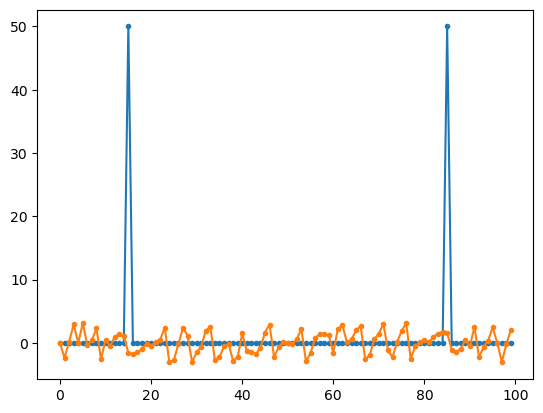

In [3]:

S=np.fft.fft(s)
S_mag = np.abs(S)
S_phase = np.angle(S)


plt.plot(t,S_mag,'.-')
plt.plot(t,S_phase, '.-')
plt.show()

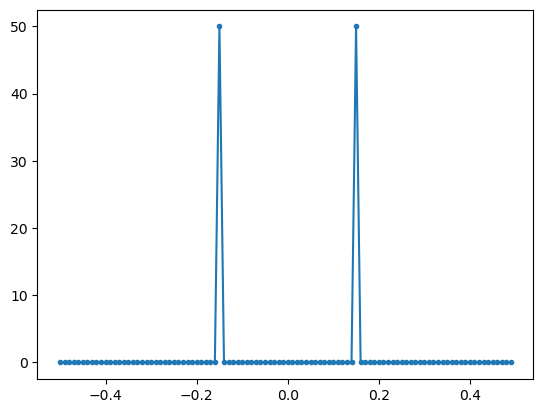

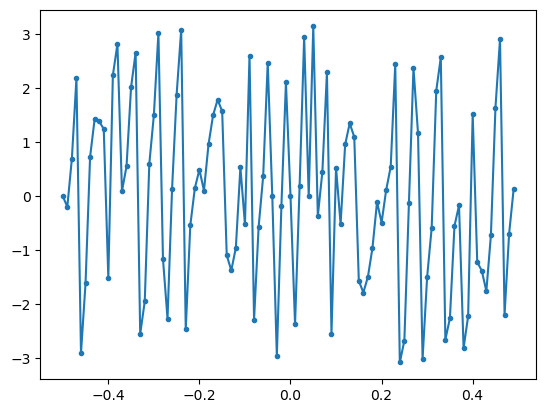

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1 # Hz
N = 100 # number of points to simulate, and our FFT size

t = np.arange(N) # because our sample rate is 1 Hz
s = np.sin(0.15*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
plt.figure(0)
plt.plot(f, S_mag,'.-')
plt.figure(1)
plt.plot(f, S_phase,'.-')
plt.show()

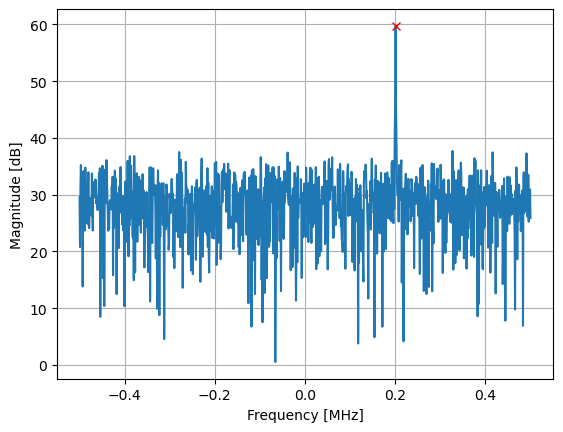

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N == 1:
        return x
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N//2) / N)
    x_even = fft(x[::2]) # yay recursion!
    x_odd = fft(x[1::2])
    return np.concatenate([x_even + twiddle_factors * x_odd,
                           x_even - twiddle_factors * x_odd])

# Simulate a tone + noise
sample_rate = 1e6
f_offset = 0.2e6 # 200 kHz offset from carrier
N = 1024
t = np.arange(N)/sample_rate
s = np.exp(2j*np.pi*f_offset*t)
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # unity complex noise
r = s + n # 0 dB SNR

# Perform fft, fftshift, convert to dB
X = fft(r)
X_shifted = np.roll(X, N//2) # equivalent to np.fft.fftshift
X_mag = 10*np.log10(np.abs(X_shifted)**2)

# Plot results
f = np.linspace(sample_rate/-2, sample_rate/2, N)/1e6 # plt in MHz
plt.plot(f, X_mag)
plt.plot(f[np.argmax(X_mag)], np.max(X_mag), 'rx') # show max
plt.grid()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Magnitude [dB]')
plt.show()

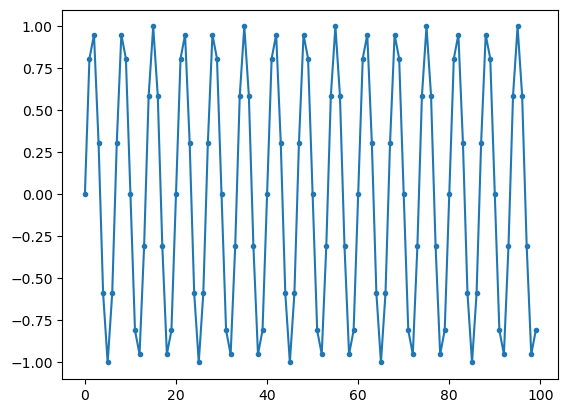

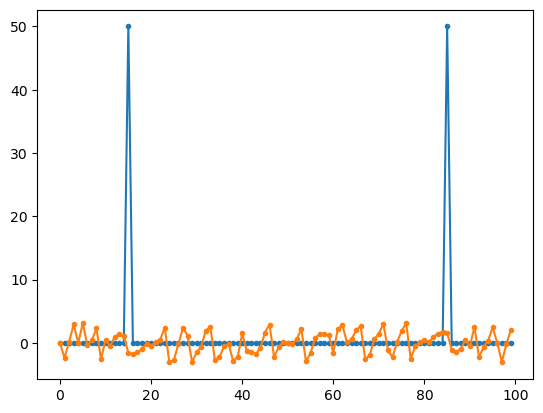

In [6]:
import numpy as np
t=np.arange(100)
s=np.sin(0.15*2*np.pi*t)

import matplotlib.pyplot as plt


plt.plot(t,s,'.-')
plt.show()

S=np.fft.fft(s)
S_mag = np.abs(S)
S_phase = np.angle(S)


plt.plot(t,S_mag,'.-')
plt.plot(t,S_phase, '.-')
plt.show()